In [ ]:
import os, sys, math
sys.path.append(f'../library')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_management
from scipy.fft import fft, fftfreq

In [2]:
def cm2inch(value):
    return value/2.54

plt.rc('xtick' , labelsize=10)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize =10)    # legend fontsize
plt.rc('axes'  , titlesize=10)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

    
linewidth = 1

width_images = 8.6

folder_library = '/home/ricval/Documenti/Cavity_python/library'

#### Fig 3 - $W=0$ and different number of levels $N$. 
##### We want to show different dynamical responses generated in $SU(N)$ coherent states

/home/ricval/Documenti/Cavity_python/Fig_2/mean_field_SU4_coherent_state/mean_field_SU4_1
/home/ricval/Documenti/Cavity_python/Fig_2/mean_field_SU3_coherent_state/mean_field_SU3_1
/home/ricval/Documenti/Cavity_python/Fig_2/mean_field_SU2_coherent_state/mean_field_SU2_1


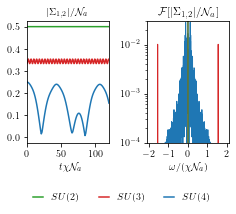

In [4]:
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
plot_dir = '/home/ricval/Documenti/DPT_SUN_paper/final_images'
main_folder = '/home/ricval/Documenti/Cavity_python/data_paper/Fig_2/'
prefix_folder = 'mean_field'
suffix_folder = ['SU2','SU3','SU4']
suffix_folder = suffix_folder[::-1]
legend = ['SU(2)','SU(3)','SU(4)']
legend = legend[::-1]

type_state = 'coherent_state'


color = ['tab:blue','tab:red','tab:green']
obs = 's01'

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(6.6)))



for idx, name in enumerate(suffix_folder):
    folder = f'{main_folder}{prefix_folder}_{name}_{type_state}/{prefix_folder}_{name}_1'
    if os.path.isdir(folder):
        print(folder)
        file_obs = f'{folder}/{obs}.npy'
        file_t = f'{folder}/time.npy'

        if os.path.isfile(file_obs) and os.path.isfile(file_t):
            O = np.abs(np.load(file_obs))
            t = np.load(file_t)
            
            dt = t[1]-t[0]
            N  = len(t)
            
            yf = fft(O)
            xf = fftfreq(N, dt)*2*math.pi

            ax2.plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , alpha=1,color=color[idx])

            ax1.plot(t,np.abs(O),label=f'${legend[idx]}$',color=color[idx])
# ax.legend()
ax1.set_xlim([0,120])
ax1.set_xticks(np.arange(0,120,step=50))

ax2.set_xlim([-2.1,2.1])

ax2.set_ylim([1E-4,0.03])
ax2.set_xticks([-2,-1,0,1,2])
ax2.set_title('$\mathcal{F}[|\Sigma_{1,2}|/\mathcal{{N}}_a]$',fontsize=11)
ax2.set_xlabel('$\omega/(\chi\mathcal{{N}}_a)$')
ax2.set_yscale('log')
ax1.set_xlabel('$t\chi \mathcal{{N}}_a$',y=0.09,x=0.53)
ax1.set_title('$|\Sigma_{1,2}|/\mathcal{{N}}_a$')
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels),ncol=3,frameon=False,loc='lower center',bbox_to_anchor=(1.15, -0.57),handlelength=1)
plt.savefig(f'{plot_dir}/dynamics_homogeneous_initial_state_equal_populations_W0_swipe_number_levels_UNIFORM_v4.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

#### Fig 4: Lyapunov exponent as a function of $p$ at disorder $W=0$. 
##### Simulations obtained from Gaussian states. The states are given by the superposition $|\psi_j\rangle = (|\gamma_1\rangle + |\gamma_2\rangle) / \sqrt{2}$ with $\gamma_1 = (\sqrt{1/3+p},\sqrt{1/3},\sqrt{1/3-p})$ and $\gamma_2 = (\sqrt{1/3},\sqrt{1/3-p},\sqrt{1/3+p})$. 
##### The results are for $\alpha=0.36$ (we have $g_1 = \sqrt{\omega_0}\sin(\alpha\pi)$ and $g_2 = \sqrt{\omega_0}\cos(\alpha\pi)$ where $\omega_0=1$ (being in the adiabatic limit, thus it is not important))

[0.28   0.2805 0.2811 0.2816 0.2822 0.2827 0.2832 0.2838 0.2843 0.2848
 0.2854 0.2859 0.2865 0.287  0.2875 0.2881 0.2886 0.2892 0.2897 0.2902
 0.2908 0.2913 0.2919 0.2924 0.2929 0.2935 0.294  0.2945 0.2951 0.2956
 0.2962 0.2967 0.2972 0.2978 0.2983 0.2989 0.2994 0.2999 0.3005]


FileNotFoundError: [Errno 2] No such file or directory: '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/lyapunov_exponent_and_dynamics_gaussian_state_L1_W0_swipe_p_v10_dO1E-8.pdf'

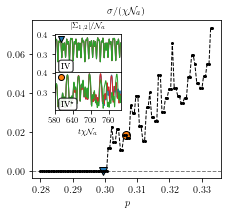

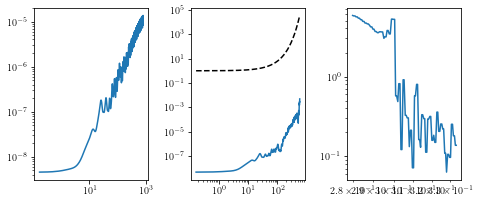

In [5]:
sys.path.append(folder_library)
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

horizonal_inset = False

results_dir = '/home/ricval/Documenti/Cavity_python/SU3_Lyapunov_swipe_p_W0.00/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8/'

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
plot_dir = '/home/ricval/Documenti/DPT_SUN_paper/final_images'
L = 1
d = 3
W = 0

# p_list = np.linspace(0.25,1/3,num=100)
p_list = np.linspace(0.28,1/3,num=100)

for idx, p in enumerate(p_list):
    p_list[idx] = round(p,4)
p_plot = [0.2994, 0.3064]

height_images = 7.4
lyapunov_exponent_abs = True
x_1 = 0.12
y_1 = 0.67
width = 0.35
height = 0.24

symbol = ['v','o','^','D']
style = ['-','-','-']
color = ['tab:blue','tab:red','tab:green']
color_marker = ['tab:blue','tab:orange']
text = ["IV","IV${{}}^\star$"]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
fig_dO, ax_dO = plt.subplots(1,3,figsize=(cm2inch(width_images)*2, cm2inch(height_images)))

ax.set_xlabel('$p$')
ax.set_title('$\sigma/(\chi\mathcal{{N}}_a)$')

# insets

# horizontal
if horizonal_inset:
    ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
    ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
    ax_2.get_yaxis().set_visible(False)
    ax_1.set_title('$|\Sigma_{{1,2}}|/\mathcal{{N}}_a$',x=1)

    for a in [ax_1,ax_2]:   
        a.set_xlabel('$t\chi\mathcal{{N}}_a$',fontsize=8)

# vertical
else:
    ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
    ax_2 = ax.inset_axes([x_1 , y_1 - height, width, height])
    ax_1.get_xaxis().set_visible(False)
    ax_1.set_title('$|\Sigma_{{1,2}}|/\mathcal{{N}}_a$',fontsize=8)
    ax_2.set_xlabel('$t\chi\mathcal{{N}}_a$',fontsize=8)

ax_inset = [ax_1,ax_2]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)



p_exist = []
lyapunov_exponent  = []
dlyapunov_exponent = []
error_list = []
for p in p_list:

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    exist = 0
    for idx in range(12):
        folder = f'{results_dir}SU{d}_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'

        if os.path.isdir(folder):
            exist += 1
            
            time = np.load(f'{folder}/timesteps.npy')
            index_t = time<10000

            time = time[index_t]

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    o = np.load(f'{folder}/{name}.npy')
                    O[name].append(o[index_t])

            
            if p in p_plot and idx < 3:

                ax_inset[p_plot.index(p)].plot(time,np.abs(O['s01'][-1]),linewidth=linewidth,linestyle=style[idx],color=color[idx])
                x_text = 0.8
                y_text = 0.3
                off_set = 220
                T = 800
                ax_inset[p_plot.index(p)].set_xlim([T-off_set,T])
                ax_inset[p_plot.index(p)].set_xticks(np.arange(T-off_set,T+1,step=60))

                x_text = 0.05
                y_text = 0.05
                x_text = 0.1
                y_text = 0.1
                ax_inset[p_plot.index(p)].text(x_text,y_text, f'{text[p_plot.index(p)]}', transform=ax_inset[p_plot.index(p)].transAxes, size=8,bbox=props)


    if exist > 2:
        p_exist.append(p)
        l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
        lyapunov_exponent.append(l[0])
        dlyapunov_exponent.append(l[1])
        error_list.append(error)

        if p in p_plot:
            ax_dO[p_plot.index(p)].plot(t,np.exp(dO[0]))
            if l[0] > 0:
                ax_dO[p_plot.index(p)].plot(t,np.exp(l[0]*t),linestyle='--',color='black')


for a in ax_dO:
    a.set_yscale('log')
    a.set_xscale('log')    

xmin , xmax = ax_1.get_xlim()
ymin_1 , ymax_1 = ax_1.get_ylim()
ymin_2 , ymax_2 = ax_2.get_ylim()

ymin = [ymin_1,ymin_2]
ymax = [ymax_1,ymax_2]

ymin = min(ymin_1,ymin_2)
ymax = max(ymax_1,ymax_2)

for idx, a in enumerate(ax_inset):
    a.set_ylim([ymin,ymax])
    x = xmin + 0.1*(xmax-xmin)
    y = ymax - 0.13*(ymax-ymin)
    a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)


for idx, p in enumerate(p_plot):
    if p in p_exist:
        ax.plot(p,lyapunov_exponent[p_exist.index(p)],marker=symbol[idx],markersize=8,color=color_marker[idx],markeredgewidth=1,markeredgecolor='black')

lyapunov_exponent = np.array(lyapunov_exponent)
index = lyapunov_exponent < 1E-4
print(p_list[index])
ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
ax.errorbar(p_exist,lyapunov_exponent,yerr=dlyapunov_exponent , linestyle='--',color='black',linewidth=linewidth,marker='o',markersize=2)
ax_dO[2].plot(p_exist,error_list)
plt.tight_layout()
ax.set_xticks([0.28,0.29,0.30,0.31,0.32,0.33])

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

fig.savefig(f"{plot_dir}/lyapunov_exponent_and_dynamics_gaussian_state_L1_W0_swipe_p_v10_dO1E-8.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()




#### Fig. 5 - optimization plot in the $SU(3)$ case. We start from a spin-coherent state poiting in $(\theta,\phi) = (0.4\pi,0.5\pi)$ (n.b. with the new codes in Cavity_python it corresponds to $\theta=0.4\pi$, in the old one is $\theta=0.6\pi$)with $\theta$ the angle with $z$-axis and $\phi$ the angle with $x$-axis on the $xy$ plane. We set $\alpha=0.47$ ($g_1 = \sin(\alpha\pi)$ and $g_2=\cos(\alpha\pi)$). Disorder is $W=0.1$
##### Results where obtained in the old codes so the initial state is with $\theta=0.6\pi$

<ipython-input-7-3f518666c00b>:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


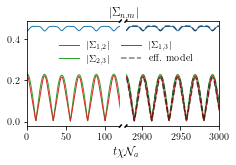

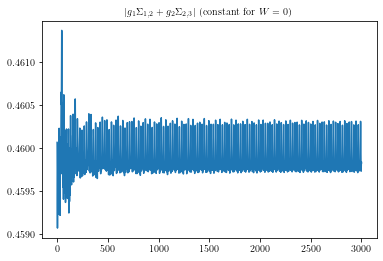

In [7]:
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
data_dir = '/home/ricval/Documenti/SUN_dynamical_response/data_paper/Fig_5_paper/SU3_spin_1_coherent_state_effective_reduction_opt_raw'

L = 10000
W_list = [0.10]
alpha = 0.47
W = 0.1
list_obs = ['S_m','S_p','S_x']#,'n1','nm1']
name_obs = ['$|\overline{\Sigma}_{1,2}|$','$|\overline{\Sigma}_{2,3}|$','$|\overline{\Sigma}_{1,3}|$']
name_obs = ['$|\Sigma_{1,2}|$','$|\Sigma_{2,3}|$','$|\Sigma_{1,3}|$']

color = ['tab:blue','tab:green','tab:red','tab:brown']
marker_list = ['v','o','^','D']
letter_list = ['(b)','(c)','(d)','(e)']

height_images = 7

fig, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)


folder = f'{data_dir}/MF_BiC_L{L}_omegaphoton1.00_alpha{alpha:.4f}_k0.00_hmean0.00_deltah{W:.2f}_qmean0.00_deltaq{W:.2f}_disorderTrue_realization_disorder1_M1.00_chiplus1.00_chiminus1.00_bosons_RWA_INDEX1_HTHETA0.6_HPHI0.5_DHTHETA0_DHPHI0'

Stot = 0

for idx , obs in enumerate(list_obs):
    
    name_file = f'{folder}/{obs}.npy'
    name_file_opt = f'{folder}/{obs}_opt.npy'

    time_file = f'{folder}/timesteps.npy'
    time_file_opt = f'{folder}/timesteps_opt.npy'

    if os.path.isfile(name_file):  
        O = np.load(name_file)
        t = np.load(time_file)

        
        ax1.plot(t,np.abs(O),label=f'$W/\chi={W:.2f}$',linewidth=linewidth,color=color[idx])
        ax2.plot(t,np.abs(O),label=f'{name_obs[idx]}',linewidth=linewidth,color=color[idx])

        if obs == 'S_m':
            Stot += np.sin(alpha*math.pi) * O
        elif obs == 'S_p':
            Stot += np.cos(alpha*math.pi) * O
       

    if W > 0 :
        if os.path.isfile(name_file_opt):
            O_opt = np.load(name_file_opt)
            t_opt = np.load(time_file_opt)
            if idx == 2:
                ax2.plot(t_opt,np.abs(O_opt),linestyle='--',color='black',alpha=0.5,linewidth=linewidth*1.5,label='eff. model')
            else:
                ax2.plot(t_opt,np.abs(O_opt),linestyle='--',color='black',alpha=0.5,linewidth=linewidth*1.5)




ax1.set_xlim([0,120])
ax2.set_xlim([2880,3000])

ax1.xaxis.set_ticks(np.arange(0, 120, 50 ))
ax2.xaxis.set_ticks(np.arange(2900, 3010, 50 ))
      
ax2.legend(ncol=2, frameon=False,loc='lower center',bbox_to_anchor=(0, 0.50),labelspacing=0.3,columnspacing=1)

fig.supxlabel('$t\chi\mathcal{{N}}_a$',y=0.14,x=0.53)
fig.suptitle('$|\Sigma_{n,m}|$',x=0.53,y=0.9)

plt.tight_layout()

fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal


plt.savefig(f'{plot_dir}/SU3_exact_vs_single_body_reduced_alpha{alpha:.2f}_W{W:.2f}_v6.pdf',bbox_inches='tight',pad_inches = 0)

fig_2, ax_extra = plt.subplots(1,1)
ax_extra.plot(t,np.abs(Stot))
ax_extra.set_title('$|g_1 \Sigma_{{1,2}} + g_2 \Sigma_{{2,3}}|$ (constant for $W=0$)')

plt.show()

#### Fig 6: $SU(4)$ vs $W$. Show the different dynamical phases accessible. 
##### The initial state is a gradient state with not-normalized bosonic amplitudes $(b_{-1},b_0,b_1,b_2) = (4,3,2,1)$. We fix $\alpha=0.36$ and $\alpha_2=0.20$ such that $g_1=\sin(\alpha\pi)\sin(\alpha_2\pi)$, $g_2=\cos(\alpha \pi) \sin(\alpha_2\pi)$ and $g_3=\cos(\alpha_2\pi)$. We have interesting phases for $W = \{0.01,0.09,0.35,2\}$ (respectively, Phase-IV, Phase-III, Phase-II, Phase-I)

<ipython-input-9-c428f321c0ce>:137: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


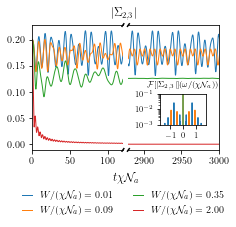

In [9]:

list_observable = ['S_m_abs']
list_observable = ['S_p_abs']

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
height_images = 8
fig, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)

ax_1 = ax2.inset_axes([0.35,0.20,0.5,0.25  ])

# GRADIENT STATE (alpha_2=0.20 , alpha=0.36)
# W=0 (phase-IV)
# W=0.09 (phase-III)
# W=0.35 (phase-II)
# W=2

############################################################



path = '/home/ricval/Documenti/SUN_dynamical_response/data_paper/Fig_3_paper'

L=10000
T=3000
omega_photon = 1
h_mean = 0
M = 1.00
htheta = 0.6
hphi = 0.5
name_prefix = ['SU4']
name_switch = 'delta_h'
alpha = 0.36
alpha_2 = 0.20

prefix_list = []
param_fixed_list = []
param_switch_list = []

for j in range(len(name_prefix)):

    prefix_list.append('{}_gradient_population'.format(name_prefix[j]))
    param = [
        ("L",L),
            ("omega_photon",omega_photon),
            ("h_mean",h_mean),
            ("q_mean",0),
            ("M",1),
             ("dphi",0),
             ("same_W",1),
            ("alpha",alpha),
            ("alpha_2",alpha_2),
             ('realization_disorder',1),
             ('HPHI',hphi),
            ('HTHETA',htheta),
            ('DHTHETA',0),
            ('DHPHI',0),
            ('dphi',0),
            ('evenly',1)
             ]
    param_fixed_list.append(param)
    param_switch_list.append([('{}'.format(name_switch),[0.01,0.09,0.35,2])])

#### do not modify

local_directory_list = []
csv_file_list = []

for prefix in prefix_list:
    local_directory_list.append('{}/{}'.format(path,prefix))
    csv_file_list.append('{}/{}/data_{}_processed.csv'.format(path,prefix,prefix))
    




for idx, name_obs in enumerate(list_observable):
    
    for j , prefix in enumerate(name_prefix):
        directory = local_directory_list[j]
        csv_file  = csv_file_list[j]
        param_switch = param_switch_list[j]
        time, obs, switch = data_management.get_obs_vs_time(directory,csv_file,param_fixed_list[j],param_switch,name_obs, False,False)

        for l in range(len(time)):
            start = int(len(time[l])/2)
            t = time[l][start:]
            O = obs[l][start:]
            
            dt = t[1]-t[0]
            N  = len(t)
            
            yf = fft(O)
            xf = fftfreq(N, dt)*2*math.pi

            index = np.argmax(np.abs(yf[1:N//2]))
            main_frequency = xf[index]
            if switch[l] in param_switch[0][1]:
                ax1.plot(time[l], np.abs(obs[l]), marker='.',markersize=0,label=f'$W/(\chi\mathcal{{N}}_a)={switch[l]:.2f}$', linewidth=linewidth , linestyle='-',alpha=1)
                ax2.plot(time[l], np.abs(obs[l]), marker='.',markersize=0,label=f'$W/(\chi\mathcal{{N}}_a)={switch[l]:.2f}$', linewidth=linewidth , linestyle='-',alpha=1)
                ax_1.plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , alpha=1)



ax1.set_xlim([0,120])
ax2.set_xlim([2880,3000])

ax1.xaxis.set_ticks(np.arange(0, 150, 50 ))
ax2.xaxis.set_ticks(np.arange(2900, 3010, 50 ))
ax1.legend(ncol=2,frameon=False,loc='lower center',bbox_to_anchor=(1, -0.6),handlelength=1)

fig.supxlabel('$t\chi\mathcal{{N}}_a$',y=0.15,x=0.53)
fig.suptitle('$|\Sigma_{2,3}|$',y=0.93,x=0.53)

ax_1.set_xlim([-1.8,1.8])
ax_1.set_ylim([1E-3,0.1])
ax_1.set_yscale('log')
ax_1.set_title('$\mathcal{F}[|\Sigma_{2,3}|](\omega/(\chi\mathcal{{N}}_a))$',fontsize=8)
ax_1.tick_params(axis='both', which='major', labelsize=8)
ax_1.tick_params(axis='both', which='minor', labelsize=8)

plt.tight_layout()

fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal

plt.savefig(f'{plot_dir}/dynamics_and_fourier_SU4_swipe_W_v3.pdf',bbox_inches='tight',pad_inches = 0)

### As above, but only long time dynamics

0.08
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L10000_p0.000_W0.080_index0
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L10000_p0.000_W0.080_index0
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L10000_alpha0.36_p0.000_W0.080_index1
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L10000_alpha0.36_p0.000_W0.080_index1
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L10000_alpha0.36_p0.000_W0.080_index2
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L10000_alpha0.36_p0.000_W0.080_index2
0.08
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L40000_alpha0.36_p0.299_W0.080_index0
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L40000_alpha0.36_p0.299_W0.080_index0
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussi

Text(0.5, 1.0, '$W/(\\chi\\mathcal{N}_a)=0.08$')

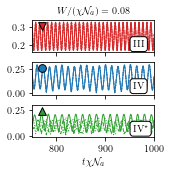

In [15]:
L_list = [40000,40000,40000]
L_list = [10000,40000,40000]
D = 3
alpha = 0.36
name_obs = 's02'
linestyle = ['-','--','dotted','--','dotted']
color = ['tab:red','tab:blue','tab:green']
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
prefix_dir = '/home/ricval/Documenti/Cavity_python/data_paper/'

main_dir_list =  [f'{prefix_dir}SU3_Gaussian_p_vs_W/',f'{prefix_dir}SU3_Gaussian_p_vs_W/', f'{prefix_dir}SU3_Gaussian_p_vs_W/',f'{prefix_dir}SU3_Gaussian_swipe_p_and_W_noise1E-5/']

height_images = 7 / 1.2
width_images = 8.6/ 1.5

############################################################

p_list = [0,0.2995,0.320]
W = 0.08
font_size = 10
text = '(a)'
x_text = 0.10
y_text = 0.8
props = dict(boxstyle='round', facecolor='white', alpha=1)


fig, ax= plt.subplots(3,1,sharex=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)



for idx_p , p in enumerate(p_list):
    L = L_list[idx_p]
    main_dir = main_dir_list[idx_p]

    print(W)
    O = {}
    for i in range(D):
        for j in range(i+1,D):
            O[f's{i}{j}'] = []

    for idx in range(2):

        
        
        folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
        if not os.path.isdir(folder):
            folder = f'{main_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p:.3f}_W{W:.3f}_index{idx}'

        if os.path.isdir(folder):
            
            print(folder)

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
            time = np.load(f'{folder}/timesteps.npy')

            start = int(len(time)/3)
            t = time[start:]
            obs = O[name_obs][start:]
            dt = t[1]-t[0]
            N  = len(t)
            yf = fft(obs)
            xf = fftfreq(N, dt)*2*math.pi


            for index_O, name in enumerate(list(O.keys())):
                if name == name_obs and idx==0:
                    index_O = 0
                    ax[idx_p].plot(time,np.abs(O[name]),label=f'$p={p:.3f}$', color=color[idx_p],linewidth=linewidth , linestyle=linestyle[idx],alpha=1)                

                elif name == name_obs and idx>0:
                    ax[idx_p].plot(time,np.abs(O[name]), linewidth=linewidth ,color=color[idx_p], linestyle=linestyle[idx],alpha=1)                



x_text = 0.83
y_text = 0.18
text = ["III","IV","IV${{}}^\star$"]
for idx, a in enumerate(ax):
    a.text(x_text,y_text, f'{text[idx]}', transform=a.transAxes,  bbox=props, size=font_size)

symbol = ['v','o','^','D']


ax[-1].set_xlim([750,1000])


for idx, a in enumerate(ax):
    xmin , xmax = a.get_xlim()
    ymin , ymax = a.get_ylim()
    x = xmin + 0.08*(xmax-xmin)
    y = ymax - 0.2*(ymax-ymin)
    a.scatter(x,y,marker=symbol[idx],color=color[idx],s=60,linewidths=1,edgecolors='black',zorder=2)



ax[-1].set_xlabel('$t\chi\mathcal{{N}}_a$')
ax[0].set_title(f'$W/(\chi\mathcal{{N}}_a)={W:.2f}$')

# plt.savefig(f'{plot_dir}/dynamics_and_fourier_Gaussian_SU3_swipe_p_L{L_list[0]}_{L_list[1]}_{L_list[2]}_W{W:.3f}_no_spectrum.pdf',bbox_inches='tight',pad_inches = 0)

### As above, but fixed $p$ and swipe $W$

0.5
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_p0.320_W0.500_index0
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_p0.320_W0.500_index1
SONO QUI
1.8
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_p0.320_W1.800_index0
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_p0.320_W1.800_index1
SONO QUI


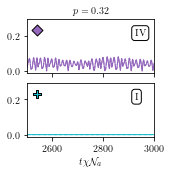

In [235]:
L_list = [20000,20000,20000]
D = 3
name_obs = 's02'
linestyle = ['-','--','dotted']
color = ['tab:red','tab:blue','tab:green']
color = ['tab:purple','tab:cyan']
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
prefix_dir = '/home/ricval/Documenti/Cavity_python/data_paper/'

main_dir_list =  [f'{prefix_dir}SU3_Gaussian_p_vs_W/',f'{prefix_dir}SU3_Gaussian_p_vs_W/', f'{prefix_dir}SU3_Gaussian_p_vs_W/',f'{prefix_dir}SU3_Gaussian_swipe_p_and_W_noise1E-5/']

height_images = 7 / 1.2
width_images = 8.6/ 1.5

############################################################

W_list = [0.50,1.8]
p = 0.32
font_size = 10
text = '(a)'
x_text = 0.10
y_text = 0.8
props = dict(boxstyle='round', facecolor='white', alpha=1)


fig, ax= plt.subplots(2,1,sharex=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)



for idx_p , W in enumerate(W_list):
    L = L_list[idx_p]
    main_dir = main_dir_list[idx_p]

    print(W)
    O = {}
    for i in range(D):
        for j in range(i+1,D):
            O[f's{i}{j}'] = []

    for idx in range(2):
        
        folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
        print(folder)

        if os.path.isdir(folder):
            

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
            time = np.load(f'{folder}/timesteps.npy')

            start = int(len(time)/3)
            t = time[start:]
            obs = O[name_obs][start:]
            dt = t[1]-t[0]
            N  = len(t)
            yf = fft(obs)
            xf = fftfreq(N, dt)*2*math.pi
            # ax_1.plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , alpha=1)


            for index_O, name in enumerate(list(O.keys())):
                if name == name_obs and idx==0:
                    index_O = 0
                    ax[idx_p].plot(time,np.abs(O[name]),label=f'$p={p:.3f}$', color=color[idx_p],linewidth=linewidth , linestyle=linestyle[idx],alpha=1)                

                elif name == name_obs and idx>0:
                    ax[idx_p].plot(time,np.abs(O[name]), linewidth=linewidth ,color=color[idx_p], linestyle=linestyle[idx],alpha=1)                

x_text = 0.85
y_text = 0.7
text = ["IV","I","IV${{}}^\star$"]
for idx, a in enumerate(ax):
    a.text(x_text,y_text, f'{text[idx]}', transform=a.transAxes,  bbox=props, size=font_size)

symbol = ['D','P','*']

ax[-1].set_xlim([2500,3000])

for idx, a in enumerate(ax):
    xmin , xmax = a.get_xlim()
    ymin , ymax = a.get_ylim()
    x = xmin + 0.08*(xmax-xmin)
    y = ymax - 0.2*(ymax-ymin)
    a.scatter(x,y,marker=symbol[idx],color=color[idx],s=60,linewidths=1,edgecolors='black',zorder=2)

ax[-1].set_xlabel('$t\chi\mathcal{{N}}_a$')
ax[0].set_title(f'$p={p:.2f}$')

plt.savefig(f'{plot_dir}/dynamics_and_fourier_Gaussian_SU3_swipe_W_p{p:.3f}_no_spectrum_v3.pdf',bbox_inches='tight',pad_inches = 0)

### Supplemental material plot - Lyapunov exponent details calculation. We show the abrupt change of slope.

1.4259734085163
[0.28, 0.2805, 0.2811, 0.2816, 0.2822, 0.2827, 0.2832, 0.2838, 0.2843, 0.2848, 0.2854, 0.2859, 0.2865, 0.287, 0.2875, 0.2881, 0.2886, 0.2892, 0.2897, 0.2902, 0.2908, 0.2913, 0.2919, 0.2924, 0.2929, 0.2935, 0.294, 0.2945, 0.2951, 0.2956, 0.2962, 0.2967, 0.2972, 0.2978, 0.2983, 0.2989, 0.2994, 0.2999, 0.3005, 0.301, 0.3015, 0.3021, 0.3026, 0.3032, 0.3037, 0.3042, 0.3048, 0.3053, 0.3059, 0.3064, 0.3069, 0.3075, 0.308, 0.3086, 0.3091, 0.3096, 0.3102, 0.3107, 0.3112, 0.3118, 0.3123, 0.3129, 0.3134, 0.3139, 0.3145, 0.315, 0.3156, 0.3161, 0.3166, 0.3172, 0.3177, 0.3182, 0.3188, 0.3193, 0.3199, 0.3204, 0.3209, 0.3215, 0.322, 0.3226, 0.3231, 0.3236, 0.3242, 0.3247, 0.3253, 0.3258, 0.3263, 0.3269, 0.3274, 0.3279, 0.3285, 0.329, 0.3296, 0.3301, 0.3306, 0.3312, 0.3317, 0.3323, 0.3328, 0.3333]


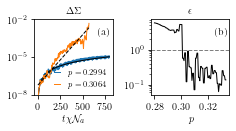

In [264]:
sys.path.append(folder_library)
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema


results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8_dt100/'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'

L = 1
d = 3
W = 0

# p_list = np.linspace(0.25,1/3,num=100)
p_list = np.linspace(0.28,1/3,num=100)

for idx, p in enumerate(p_list):
    p_list[idx] = round(p,4)
p_plot = [0.2994, 0.3064]
width_images = 8.6
height_images = 4.9



fig, (ax,ax_1) = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(height_images)))

ax.set_title('$\Delta\Sigma$')
ax.set_xlabel('$t\chi\mathcal{{N}}_a$')


p_exist = []
error_list = []
for p in p_list:

    exist = 0

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    for idx in range(12):
        folder = f'{results_dir}SU{d}_Gaussian_L{L}_W{W:.3f}_p{p:.4f}_index{idx}'
        folder = f'{results_dir}SU{d}_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'

        if os.path.isdir(folder):
            exist += 1
            
            time = np.load(f'{folder}/timesteps.npy')
            index_t = time<10000

            time = time[index_t]

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    o = np.load(f'{folder}/{name}.npy')
                    O[name].append(o[index_t])
 

    if exist > 2:
        p_exist.append(p)
        
        l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
        dO_av = dO[0]
        dO_st = dO[1]

        index = np.argmax(dO_av > np.log(0.005))
        if index == 0:
            index = len(dO_av)
        dO_av = dO_av[:index]
        dO_st = dO_st[:index]
        t = t[:index]


        index = dO_av > -20

        dO_av = dO_av[index]
        dO_st = dO_st[index]
        t = t[index]

        # error_list.append(error)

        [m, q]  , residual_exp , _ , _ , _ = np.polyfit(t, dO_av, 1,w = 1/ dO_st,full=True)
        [alpha , beta] , residual_pol , _ , _ , _ = np.polyfit(np.log(t), dO_av, 1,w = 1/  dO_st,full=True)

        error_list.append(residual_exp[0]/residual_pol[0])
        if p in p_plot:
            # print(l[0])

            [m, q]  , residual_exp , _ , _ , _ = np.polyfit(t, dO_av, 1,w = 1/ dO_st,full=True)
            [alpha , beta] , residual_pol , _ , _ , _ = np.polyfit(np.log(t), dO_av, 1,w = 1/  dO_st,full=True)
            ax.plot(t,np.exp(dO_av),label=f'$p={p:.4f}$',linewidth=1)

            # print(residual_exp[0]/residual_pol[0])
            if residual_exp[0] < residual_pol[0]:
                ax.plot(t,np.exp(m*t)*np.exp(q),linestyle='--',color='black',linewidth=1)
                
            else:
                print(alpha)
                ax.plot(t,np.exp(beta)*(t**alpha),linestyle='-',color='black',linewidth=1)

print(p_exist)
x_1 = 0.2
y_1 = 0.6
width = 0.3
height = 0.3
ax.set_xticks([0,250,500,750])
# ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
ax_1.set_title('$\epsilon$')
ax_1.set_yscale('log')
# ax_1.set_yticks([0,1,2,3,4,5])
ax_1.set_xlabel('$p$')
ax_1.plot(p_exist,error_list,color='black',linewidth=1)    
ax_1.set_xticks([0.28,0.3,0.32])
ax_1.axhline(y=1, color='grey', linestyle='--',linewidth=1)
ax.legend(ncol=1,loc='lower right',frameon=False,handlelength=0.8,fontsize=8)
ax.set_yscale('log')
ax.set_ylim([1E-8,1E-2])
plt.tight_layout()

ax.text(0.8,0.8, '(a)', transform=ax.transAxes, size=10)
ax_1.text(0.8,0.8, '(b)', transform=ax_1.transAxes, size=10)


# ax1.legend(ncol=2,frameon=False,loc='lower center',bbox_to_anchor=(1, -0.6),handlelength=1)
fig.savefig(f"{plot_dir}appendix_lyapunov_exponent_calculation_gaussian_state_L1_swipe_p_dO1E-8_v2.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()



#### Dynamical response diagram as a function of $p$ and $\theta = \arctan(g_1/g_2)$ (Lyapunov exponent)

[0.24, 0.25, 0.26, 0.36]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.36
[0.303 0.306 0.309 0.312 0.315 0.318 0.321 0.324 0.327 0.33  0.333]


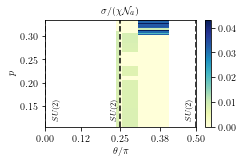

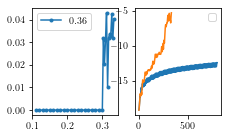

In [10]:
sys.path.append(folder_library)
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

horizonal_inset = False

results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_theta_noise1E-8/'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'

L = 1
d = 3
W = 0

p_list = [0.01 * j for j in range(10)]
p_list += [0.1 + 0.01*j for j in range(10)]
p_list += [0.2 + 0.01*j for j in range(10)]
p_list += [0.3 + 0.001*j for j in range(34)]

p_plot = [0.28,0.321]
for idx, p in enumerate(p_list):
    p_list[idx] = round(p,3)

height_images = 5
lyapunov_exponent_abs = True


fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))

ax.set_xlabel('$\\theta/\pi$')
ax.set_ylabel('$p$')
ax.set_title('$\sigma/(\chi\mathcal{{N}}_a)$')

alpha_list = [round(0.00 + 0.01 * j,2) for j in range(51)]
# alpha_list = [0.24,0.25,0.26,0.36]
# alpha_list = alpha_list[::4]
# p_list = p_list[::4]
p_list = np.array(p_list)
p_list = p_list[p_list>0.1]
print(alpha_list)
matrix_lyapunov = []
alpha_exist = []
p_exist = []

alpha_plot = [0.36]
fig2, ax2 = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(height_images)))

for idx, alpha in enumerate(alpha_list):
    lyapunov_exponent  = []
    dlyapunov_exponent = []
    error_list = []
    p_exist_single_alpha = []
    for p in p_list:
        # print(f'{alpha} {p}')
        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(12):
            folder = f'{results_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p:.3f}_W{W:.3f}_index{idx}'

            if os.path.isdir(folder):
                # if idx == 0:
                #     print(folder)

                exist += 1
                
                time = np.load(f'{folder}/timesteps.npy')
                index_t = time<10000

                time = time[index_t]

                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        o = np.load(f'{folder}/{name}.npy')
                        O[name].append(o[index_t])

        if exist > 2:
            p_exist_single_alpha.append(p)
            l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
            lyapunov_exponent.append(l[0])
            dlyapunov_exponent.append(l[1])
            error_list.append(error)


            if alpha in alpha_plot and p in p_plot:
                ax2[1].plot(t,dO[0])

    if idx == 0 or len(p_exist) == 0:
        p_exist = p_exist_single_alpha
        p_list = p_exist

    if len(lyapunov_exponent) > 0 and p_exist == p_exist_single_alpha:
        # for idx , lyap in enumerate(lyapunov_exponent):
        #     if lyap < 1E-2:
        #         lyapunov_exponent[idx] = 0

        alpha_exist.append(alpha)
        matrix_lyapunov.append(lyapunov_exponent)
        if alpha in alpha_plot:
            ax2[0].plot(p_exist,lyapunov_exponent,label=f'{alpha}',marker='.')
            lyapunov_exponent = np.array(lyapunov_exponent)
            p_exist_array = np.array(p_exist)
            print(alpha)
            print(p_exist_array[lyapunov_exponent>1E-4])
            p_reg = p_exist_array[lyapunov_exponent<1E-4][-1]
            p_reg = 0.15
            for k in range(2):
                folder = f'{results_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p_reg:.3f}_W{W:.3f}_index{k}'

                if os.path.isdir(folder):
                    time = np.load(f'{folder}/timesteps.npy')
                    o = np.load(f'{folder}/s12.npy')
                    # ax2[1].plot(time,np.abs(o),label=f'{p_reg} {alpha}')

matrix_lyapunov = np.array(matrix_lyapunov)

pcm = ax.pcolormesh(alpha_exist,p_exist,np.transpose(matrix_lyapunov)
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")
# ax2.legend()
for a in ax2:
    a.legend()
fig.colorbar(pcm, ax=ax,location='right')
ax.set_xticks([0.00,0.12,0.25,0.38,0.50])
ax.axvline(x=0, color='black', linestyle='--',linewidth=1.5)
ax.axvline(x=0.25, color='black', linestyle='--',linewidth=1.5)
ax.axvline(x=0.5, color='black', linestyle='--',linewidth=1.5)
rotation='vertical'
x_text = 0.05
y_text = 0.07
ax.text(x_text,y_text, f'$SU(2)$', transform=ax.transAxes, size=8,rotation='vertical')
x_text = 0.93
# y_text = 0.45
ax.text(x_text,y_text, f'$SU(2)$', transform=ax.transAxes, size=8,rotation='vertical')
x_text = 0.43
# y_text = 0.45
ax.text(x_text,y_text, f'$SU(2)$', transform=ax.transAxes, size=8,rotation='vertical')
# fig.savefig(f"{plot_dir}/lyapunov_exponent_gaussian_state_L1_W0_swipe_p_swipe_theta_dO1E-8_v5_no_cutoff.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()

#### Lyapunov exponent as a function of the fraction of cat states $Q$ and $p$.

[0.33]
0.36
[]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


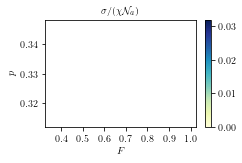

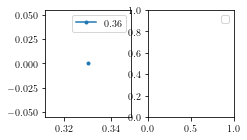

In [5]:
sys.path.append(folder_library)
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

horizonal_inset = False

results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_quantumbubble_p_Q_W0.00_1E-8/'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'

L = 1000
d = 3
W = 0.05
alpha = 0.36


height_images = 5
lyapunov_exponent_abs = True


fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))

ax.set_xlabel('$F$')
ax.set_ylabel('$p$')
ax.set_title('$\sigma/(\chi\mathcal{{N}}_a)$')
p_list = [0.30,0.305,0.310,0.315,0.320,0.325,0.33,1/3]

p_list = [0.30,0.305,0.310,0.315,0.320,0.325,1/3]
p_list += list([0.30 + 0.002 * j for j in range(1,3)])
p_list += list([0.305 + 0.002 * j for j in range(1,3)])
p_list += list([0.310 + 0.002 * j for j in range(1,3)])
p_list += list([0.315 + 0.002 * j for j in range(1,3)])
p_list += list([0.320 + 0.002 * j for j in range(1,3)])
p_list += list([0.325 + 0.002 * j for j in range(1,3)])
p_list += [0.331, 0.332]
p_list = [0.33]
p_list.sort()
print(p_list)
Q_list = np.array(list([j * 0.05 for j in range(21)]))
Q_list = Q_list[Q_list>0.35]
# Q_list = 
p_list = np.array(p_list)
matrix_lyapunov = []
Q_exist = []
p_exist = []
Q_plot = [0.55]
fig2, ax2 = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(height_images)))

for idx, Q in enumerate(Q_list):
    lyapunov_exponent  = []
    dlyapunov_exponent = []
    error_list = []
    p_exist_single_Q = []
    for p in p_list:
        # print(f'{alpha} {p}')
        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(12):
            folder = f'{results_dir}SU{d}_Gaussian_L{L}_alpha{alpha:.2f}_Q{Q:.3f}_p{p:.3f}_W{W:.3f}_index{idx}'
            # print(folder)
            if os.path.isdir(folder):
                exist += 1
                
                time = np.load(f'{folder}/timesteps.npy')
                index_t = time<10000
                time = time[index_t]

                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        o = np.load(f'{folder}/{name}.npy')
                        O[name].append(o[index_t])

        if exist > 2:
            p_exist_single_Q.append(p)
            l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
            lyapunov_exponent.append(l[0])
            dlyapunov_exponent.append(l[1])
            error_list.append(error)

    if idx == 0 or len(p_exist) == 0:
        p_exist = p_exist_single_Q
        p_list  = p_exist

    if len(lyapunov_exponent) > 0 and p_exist == p_exist_single_Q:
        # for idx , lyap in enumerate(lyapunov_exponent):
        #     if lyap < 1E-2:
        #         lyapunov_exponent[idx] = 0

        Q_exist.append(Q)
        matrix_lyapunov.append(lyapunov_exponent)
        if Q in Q_plot:
            ax2[0].plot(p_exist,lyapunov_exponent,label=f'{alpha}',marker='.')
            lyapunov_exponent = np.array(lyapunov_exponent)
            p_exist_array = np.array(p_exist)
            print(alpha)
            print(p_exist_array[lyapunov_exponent>1E-4])
            p_reg = p_exist_array[lyapunov_exponent<1E-4][-1]
            p_reg = 0.15
            for k in range(2):
                folder = f'{results_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_Q{Q:.3f}_p{p_reg:.3f}_W{W:.3f}_index{k}'

                if os.path.isdir(folder):
                    time = np.load(f'{folder}/timesteps.npy')
                    o = np.load(f'{folder}/s12.npy')
                    ax2[1].plot(time,np.abs(o),label=f'{p_reg} {alpha}')

matrix_lyapunov = np.array(matrix_lyapunov)
# print(matrix_lyapunov)
pcm = ax.pcolormesh(Q_exist,p_exist,np.transpose(matrix_lyapunov)
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")
# ax2.legend()
for a in ax2:
    a.legend()
fig.colorbar(pcm, ax=ax,location='right')
ax.set_xticks([0.4,0.5,0.6,0.7,0.8,0.9,1])

# fig.savefig(f"{plot_dir}/lyapunov_exponent_gaussian_state_L{L}_W0_swipe_p_swipe_Q_dO1E-8_v4.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()